In [18]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd 

df = pd.read_csv('mvreview - mvreview.csv')

In [10]:
import re 

def clean_text(text):
    function_clean = re.sub("[^A-Za-z]", " " , text)
    return function_clean 

df['clean_text'] = df['reviews'].apply(clean_text)
df

,reviews,clean_text
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have...
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight ...
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...
5,The Karen Carpenter Story shows a little more ...,The Karen Carpenter Story shows a little more ...
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",The Cell is an exotic masterpiece a dizzyin...
7,This film tried to be too many things all at o...,This film tried to be too many things all at o...
8,This movie was so frustrating. Everything seem...,This movie was so frustrating Everything seem...
9,War movie' is a Hollywood genre that has been ...,War movie is a Hollywood genre that has been ...


In [3]:
from hashlib import new
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')# for tokenization
nltk.download('omw-1.4') #for wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
pos_dict = {"J": wordnet.ADJ, "N":wordnet.NOUN, "V":wordnet.VERB, "R":wordnet.ADV}

def token_pos_stop(text):
    tags = pos_tag(word_tokenize(text))
    new_list = []
    for word , tag in tags:
        if word.lower() not in set(stopwords.words("english")):
            new_list.append(tuple([word,pos_dict.get(tag[0])]))
    return new_list 

df['POS Stopped'] = df['clean_text'].apply(token_pos_stop)
df

,reviews,clean_text,POS Stopped
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...,"[(success, n), (Die, n), (Hard, n), (sequels, ..."
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...,"[(terrible, a), (misfortune, n), (view, v), (b..."
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have...,"[(absolutely, r), (stunning, a), (movie, n), (..."
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight ...,"[(First, n), (let, n), (get, v), (things, n), ..."
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...,"[(worst, a), (movie, n), (saw, v), (WorldFest,..."
5,The Karen Carpenter Story shows a little more ...,The Karen Carpenter Story shows a little more ...,"[(Karen, n), (Carpenter, n), (Story, n), (show..."
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",The Cell is an exotic masterpiece a dizzyin...,"[(Cell, n), (exotic, a), (masterpiece, n), (di..."
7,This film tried to be too many things all at o...,This film tried to be too many things all at o...,"[(film, n), (tried, v), (many, a), (things, n)..."
8,This movie was so frustrating. Everything seem...,This movie was so frustrating Everything seem...,"[(movie, n), (frustrating, a), (Everything, n)..."
9,War movie' is a Hollywood genre that has been ...,War movie is a Hollywood genre that has been ...,"[(War, n), (movie, n), (Hollywood, n), (genre,..."


In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmetizer = WordNetLemmatizer()

def stem_words(pos_words):
    lemmatize_new = " " 
    for word, pos in pos_words:
        if not pos:
            lemma = word
            lemmatize_new = lemmatize_new + " " + lemma 
        else:
            lemma = wordnet_lemmetizer.lemmatize(word, pos=pos)
            lemmatize_new = lemmatize_new + " " + lemma
    return lemmatize_new

df['Stem_Words'] = df['POS Stopped'].apply(stem_words)
df

,reviews,clean_text,POS Stopped,Stem_Words
0,After the success of Die Hard and it's sequels...,After the success of Die Hard and it s sequels...,"[(success, n), (Die, n), (Hard, n), (sequels, ...",success Die Hard sequel surprise really glut...
1,I had the terrible misfortune of having to vie...,I had the terrible misfortune of having to vie...,"[(terrible, a), (misfortune, n), (view, v), (b...",terrible misfortune view b movie entirety br...
2,"What an absolutely stunning movie, if you have...",What an absolutely stunning movie if you have...,"[(absolutely, r), (stunning, a), (movie, n), (...",absolutely stunning movie hrs kill watch reg...
3,"First of all, let's get a few things straight ...",First of all let s get a few things straight ...,"[(First, n), (let, n), (get, v), (things, n), ...",First let get thing straight anime fan alway...
4,This was the worst movie I saw at WorldFest an...,This was the worst movie I saw at WorldFest an...,"[(worst, a), (movie, n), (saw, v), (WorldFest,...",bad movie saw WorldFest also receive least a...
5,The Karen Carpenter Story shows a little more ...,The Karen Carpenter Story shows a little more ...,"[(Karen, n), (Carpenter, n), (Story, n), (show...",Karen Carpenter Story show little singer Kar...
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",The Cell is an exotic masterpiece a dizzyin...,"[(Cell, n), (exotic, a), (masterpiece, n), (di...",Cell exotic masterpiece dizzying trip vast m...
7,This film tried to be too many things all at o...,This film tried to be too many things all at o...,"[(film, n), (tried, v), (many, a), (things, n)...",film try many thing sting political satire H...
8,This movie was so frustrating. Everything seem...,This movie was so frustrating Everything seem...,"[(movie, n), (frustrating, a), (Everything, n)...",movie frustrating Everything seem energetic ...
9,War movie' is a Hollywood genre that has been ...,War movie is a Hollywood genre that has been ...,"[(War, n), (movie, n), (Hollywood, n), (genre,...",War movie Hollywood genre do redo many time ...


In [16]:
final_data = df[['reviews','Stem_Words']]
final_data.head()

,reviews,Stem_Words
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...


In [20]:
from textblob import TextBlob

def subjectivityscore(review):
    return TextBlob(review).sentiment.subjectivity

def polarityscore(review):
    return TextBlob(review).sentiment.polarity

def analysis(Score):
    if Score < 0:
        return "Negative"
    elif Score == 0:
        return "Neutral"
    else:
        return "Positive"

In [21]:
final_data['Polarity'] = final_data['Stem_Words'].apply(polarityscore)
final_data['Analysis'] = final_data['Polarity'].apply(analysis)
final_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_548\543582021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Polarity'] = final_data['Stem_Words'].apply(polarityscore)


,reviews,Stem_Words,Polarity,Analysis
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Positive
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Positive
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Positive
5,The Karen Carpenter Story shows a little more ...,Karen Carpenter Story show little singer Kar...,0.145052,Positive
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",Cell exotic masterpiece dizzying trip vast m...,0.179569,Positive
7,This film tried to be too many things all at o...,film try many thing sting political satire H...,-0.017708,Negative
8,This movie was so frustrating. Everything seem...,movie frustrating Everything seem energetic ...,-0.026535,Negative
9,War movie' is a Hollywood genre that has been ...,War movie Hollywood genre do redo many time ...,0.011721,Positive


In [24]:
final_data['Analysis'].value_counts()

Analysis
Positive    37
Negative    12
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29376e537d0>,
 [Text(-0.790184279258688, 0.7652508117032141, 'Positive'),
  Text(0.7901842792586878, -0.7652508117032142, 'Negative')],
 [Text(-0.43100960686837525, 0.4174095336562985, '75.5'),
  Text(0.43100960686837514, -0.41740953365629857, '24.5')])

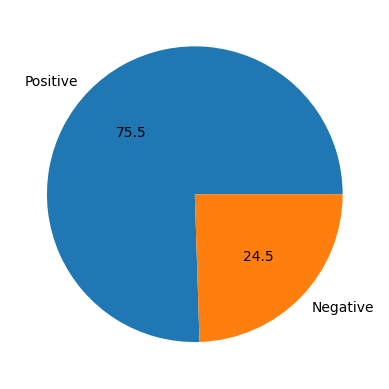

In [27]:
import matplotlib.pyplot as plt 

count = final_data['Analysis'].value_counts()
plt.pie(count.values, labels = count.index, autopct="%1.1f")

In [28]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalyzer(review):
    score = analyzer.polarity_scores(review)
    return score['compound']

final_data['VaderSentiment'] = final_data['Stem_Words'].apply(vadersentimentanalyzer)

In [32]:
final_data

,reviews,Stem_Words,Polarity,Analysis,VaderSentiment
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Positive,0.8666
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative,-0.9347
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Positive,0.4536
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative,0.8836
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Positive,0.9049
5,The Karen Carpenter Story shows a little more ...,Karen Carpenter Story show little singer Kar...,0.145052,Positive,0.9382
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",Cell exotic masterpiece dizzying trip vast m...,0.179569,Positive,0.9955
7,This film tried to be too many things all at o...,film try many thing sting political satire H...,-0.017708,Negative,-0.6289
8,This movie was so frustrating. Everything seem...,movie frustrating Everything seem energetic ...,-0.026535,Negative,0.5379
9,War movie' is a Hollywood genre that has been ...,War movie Hollywood genre do redo many time ...,0.011721,Positive,-0.9939


In [35]:
def vader_score(compound):
    if compound >= 0.5:
        return "Positive"
    elif compound <= 0.5:
        return "Negative"
    else:
        return "Neutral"

In [36]:
final_data['Vader Analysis'] = final_data["VaderSentiment"].apply(vader_score)
final_data

,reviews,Stem_Words,Polarity,Analysis,VaderSentiment,Vader Analysis
0,After the success of Die Hard and it's sequels...,success Die Hard sequel surprise really glut...,0.035101,Positive,0.8666,Positive
1,I had the terrible misfortune of having to vie...,terrible misfortune view b movie entirety br...,-0.176833,Negative,-0.9347,Negative
2,"What an absolutely stunning movie, if you have...",absolutely stunning movie hrs kill watch reg...,0.333333,Positive,0.4536,Negative
3,"First of all, let's get a few things straight ...",First let get thing straight anime fan alway...,-0.039553,Negative,0.8836,Positive
4,This was the worst movie I saw at WorldFest an...,bad movie saw WorldFest also receive least a...,0.045370,Positive,0.9049,Positive
5,The Karen Carpenter Story shows a little more ...,Karen Carpenter Story show little singer Kar...,0.145052,Positive,0.9382,Positive
6,"""The Cell"" is an exotic masterpiece, a dizzyin...",Cell exotic masterpiece dizzying trip vast m...,0.179569,Positive,0.9955,Positive
7,This film tried to be too many things all at o...,film try many thing sting political satire H...,-0.017708,Negative,-0.6289,Negative
8,This movie was so frustrating. Everything seem...,movie frustrating Everything seem energetic ...,-0.026535,Negative,0.5379,Positive
9,War movie' is a Hollywood genre that has been ...,War movie Hollywood genre do redo many time ...,0.011721,Positive,-0.9939,Negative


In [38]:
vader_counts = final_data['Vader Analysis'].value_counts()
vader_counts

Vader Analysis
Positive    30
Negative    19
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29379a99550>,
 [Text(-0.790184279258688, 0.7652508117032141, 'Positive'),
  Text(0.7901842792586878, -0.7652508117032142, 'Negative')],
 [Text(-0.43100960686837525, 0.4174095336562985, '75.5'),
  Text(0.43100960686837514, -0.41740953365629857, '24.5')])

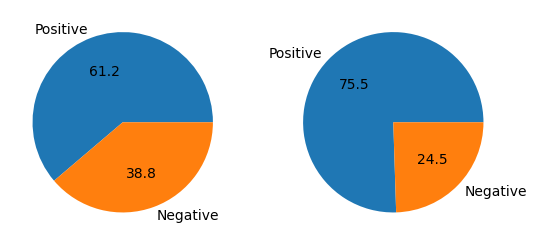

In [40]:
import matplotlib.pyplot as plt 

vader_counts = final_data['Vader Analysis'].value_counts()
plt.subplot(1,2,1)
plt.pie(vader_counts.values, labels = vader_counts.index, autopct="%1.1f")
plt.subplot(1,2,2)
plt.pie(count.values, labels = count.index, autopct="%1.1f")